In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.metrics import mean_squared_error,r2_score

### Input data: Initial Analysis

In [3]:
moon = pd.read_table(
        "../Data/horizons_results_moon_1yr.txt", 
        names=['Time', 'Solar', 'Lunar' , 'R.A.', 'DEC',  'dRA*cosD', 'd(DEC)',  'T-O-M', 'MN_Illu%'],
        delimiter=',',
        index_col=False,
        skiprows = 62,
        skipfooter = 81,
        engine='python')
moon['Hours'] = pd.to_datetime(moon['Time']).astype(int) / 3600 / 10**9 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [8]:
sun = pd.read_table(
        "../Data/horizons_results_sun_1yr.txt", 
        names=['Time', 'Solar', 'Lunar' , 'R.A.', 'DEC',  'dRA*cosD', 'd(DEC)',  'T-O-M', 'MN_Illu%'],
        delimiter=',',
        index_col=False,
        skiprows = 62,
        skipfooter = 81,
        engine='python')
sun['Hours'] = pd.to_datetime(moon['Time']).astype(int) / 3600 / 10**9 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [293]:
len(moon)

8760

In [27]:
sun.head()

,Time,Solar,Lunar,R.A.,DEC,dRA*cosD,d(DEC),T-O-M,MN_Illu%,Hours
0,2018-Jan-01 01:00,*,,281.21387,-23.03871,151.1633,11.56027,163.7,98.0045,420768.0
1,2018-Jan-01 02:00,*,,281.25946,-23.03555,150.8457,11.74466,164.5,98.1801,420769.0
2,2018-Jan-01 03:00,*,,281.30496,-23.03233,150.6291,11.95606,165.2,98.3514,420770.0
3,2018-Jan-01 04:00,*,,281.35041,-23.02905,150.5280,12.18333,166.0,98.5158,420771.0
4,2018-Jan-01 05:00,*,,281.39585,-23.02571,150.5490,12.41424,166.7,98.6707,420772.0


In [28]:
moon_rev = moon.rename(columns={'R.A.':'M_RA', 'DEC':'M_DEC', 'dRA*cosD':'M_dRA*cosD', 'd(DEC)':'M_d(DEC)'})

In [92]:
sun_rev = sun.rename(columns={'R.A.':'S_RA', 'DEC':'S_DEC', 'dRA*cosD':'S_dRA*cosD', 'd(DEC)':'S_d(DEC)'})

In [93]:
Input = pd.concat([moon_rev, sun_rev[['S_RA', 'S_DEC', 'S_dRA*cosD', 'S_d(DEC)']]], axis=1, sort=False)
Input =Input[:-1]

In [291]:
Input.columns

Index(['Time', 'Solar', 'Lunar', 'M_RA', 'M_DEC', 'M_dRA*cosD', 'M_d(DEC)',
       'T-O-M', 'MN_Illu%', 'Hours', 'S_RA', 'S_DEC', 'S_dRA*cosD', 'S_d(DEC)',
       'delta_RA', 'delta_RA_R1', 'delta_DEC', 'delta_RA_R2', 'delta_RA_R3',
       'delta_-RA', 'delta_RA_R4', 'delta_RA_R5', 'delta_RA_R6'],
      dtype='object')

In [276]:
Input['delta_RA']=Input['S_RA']-Input['M_RA']
Input['delta_-RA']=Input['M_RA']-Input['S_RA']
Input['delta_RA_R1']=Input['delta_RA'].agg(lambda x: x%180)
Input['delta_RA_R2']=Input['delta_RA'].agg(lambda x: abs(x)%180)
Input['delta_RA_R3']=Input['delta_RA'].agg(lambda x: (360-abs(x)))
Input['delta_RA_R4']=Input.agg(lambda x: min(x['S_RA']-x['M_RA'],x['M_RA']-x['S_RA']),axis=1)
Input['delta_RA_R5']=Input['delta_RA'].agg(lambda x: (180-abs(x)))
Input['delta_RA_R6']=Input['delta_RA'].agg(lambda x: abs(180-abs(x)))

Input['delta_DEC']=Input['S_DEC']-Input['M_DEC']

Text(0.5, 0, 'Hours')

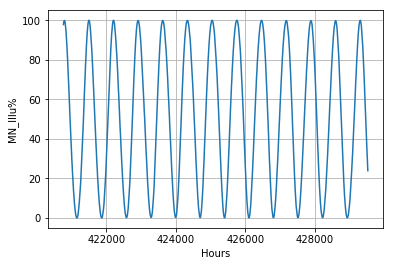

In [300]:
plt.plot(Input['Hours'], Input['MN_Illu%'])
plt.grid(True)
plt.ylabel('MN_Illu%')
plt.xlabel('Hours')

Text(0.5, 0, 'Hours')

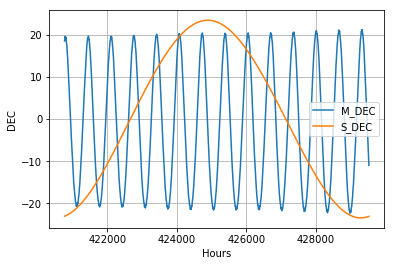

In [301]:
plt.plot(Input['Hours'], Input['M_DEC'])
plt.plot(Input['Hours'], Input['S_DEC'])
plt.legend()
plt.grid(True)
plt.ylabel('DEC')
plt.xlabel('Hours')

Text(0.5, 0, 'Hours')

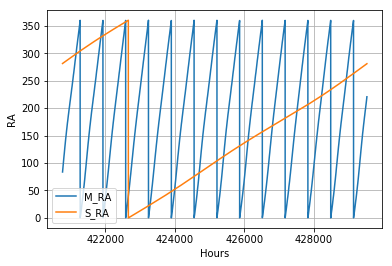

In [302]:

plt.plot(Input['Hours'], Input['M_RA'])
plt.plot(Input['Hours'], Input['S_RA'])
plt.legend()
plt.grid(True)
plt.ylabel('RA')
plt.xlabel('Hours')

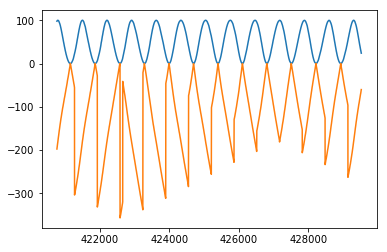

In [262]:
# test[:1440]
plt.plot(Input['Hours'], Input['MN_Illu%'])
plt.plot(Input['Hours'], Input['delta_RA_R4'])

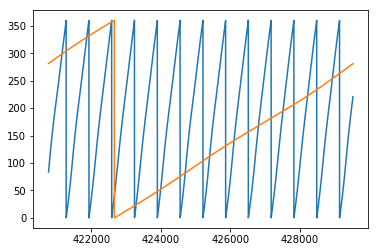

In [146]:
# basic
plt.plot(Input['Hours'], Input['M_RA'])
plt.plot(Input['Hours'], Input['S_RA'])

Text(0.5, 0, 'Hours')

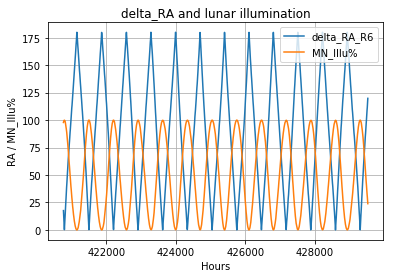

In [333]:
plt.plot(Input['Hours'], Input['delta_RA_R6'])
plt.plot(Input['Hours'], Input['MN_Illu%'])
plt.title("delta_RA and lunar illumination")
plt.legend()
plt.grid(True)
plt.ylabel('RA / MN_Illu%')
plt.xlabel('Hours')

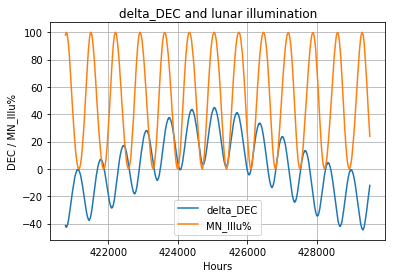

In [308]:
plt.plot(Input['Hours'], Input['delta_DEC'])
plt.plot(Input['Hours'], Input['MN_Illu%'])
plt.title("delta_DEC and lunar illumination")
plt.legend()
plt.grid(True)
plt.ylabel('DEC / MN_Illu%')
plt.xlabel('Hours')
plt.grid(True)

### Linear regression_v1

In [218]:
Input.columns

Index(['Time', 'Solar', 'Lunar', 'M_RA', 'M_DEC', 'M_dRA*cosD', 'M_d(DEC)',
       'T-O-M', 'MN_Illu%', 'Hours', 'S_RA', 'S_DEC', 'S_dRA*cosD', 'S_d(DEC)',
       'delta_RA', 'delta_RA_R1', 'delta_DEC', 'delta_RA_R2', 'delta_RA_R3',
       'delta_-RA', 'delta_RA_R4', 'delta_RA_R5'],
      dtype='object')

In [378]:
Y=Input['MN_Illu%']
X=Input[['delta_-RA', 'delta_DEC']]
X = sm.add_constant(X)

X_train, X_test , y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2)

In [379]:
model = sm.OLS(y_train, X_train).fit() 
predictions = model.predict(X_test)
fitting=model.predict(X_train)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               MN_Illu%   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     14.23
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           6.82e-07
Time:                        20:22:34   Log-Likelihood:                -34835.
No. Observations:                7007   AIC:                         6.968e+04
Df Residuals:                    7004   BIC:                         6.970e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.0844      0.419    122.046      0.0

In [337]:
predict=model.predict(sm.add_constant(X_test))

y_predict=predict
mean_squared_error(y_predict,y_test)

20.43104869904532

770.0629555999838


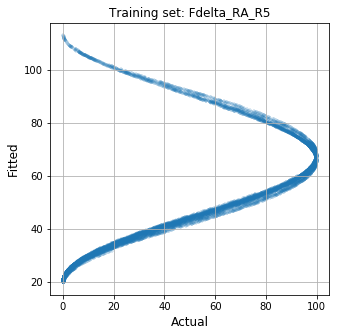

In [345]:
fig = plt.figure(figsize=(5,5))
plt.scatter(y_train, fitting,marker="+",alpha=0.2,s=10)
plt.grid(True)
plt.xlabel('Actual',fontsize=12)
plt.ylabel('Fitted',fontsize=12)
plt.title('Training set: Fdelta_RA_R5',fontsize=12)
print(mean_squared_error(y_train, fitting))

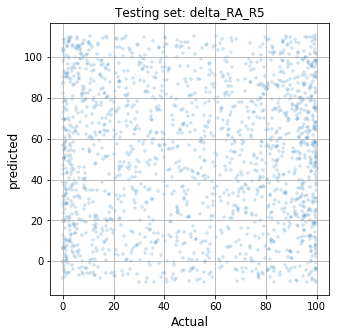

In [347]:
fig = plt.figure(figsize=(5,5))
plt.scatter(y_test, y_predict,marker="+",alpha=0.2,s=10)
plt.xlabel('Actual',fontsize=12)
plt.ylabel('predicted',fontsize=12)
plt.title('Testing set: delta_RA_R5',fontsize=12)
plt.grid(True)

### Random Forest_v2

In [395]:
Y=Input['MN_Illu%']
X=Input[['delta_RA', 'delta_DEC']]
#X=Input[['delta_RA_R5']]

X_train, X_test , y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2)

In [396]:
rf = RandomForestRegressor(max_depth=30)
rf.fit(X_train,  y_train);

y_fit=rf.predict(X_train)
y_predict=rf.predict(X_test)

rf.score(X_train,y_train)

0.999988616726384

Text(0.5, 1.0, 'Training set: delta_RA')

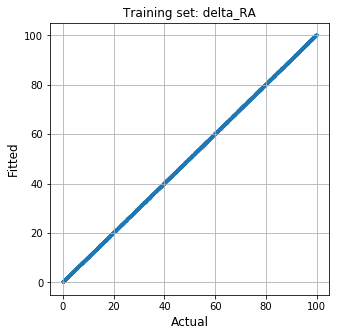

In [399]:
fig = plt.figure(figsize=(5,5))
plt.scatter(y_train, y_fit,marker="+",alpha=0.2,s=10)
plt.grid(True)
plt.xlabel('Actual',fontsize=12)
plt.ylabel('Fitted',fontsize=12)
plt.title('Training set: delta_RA',fontsize=12)

Text(0.5, 1.0, 'Testing set: delta_RA')

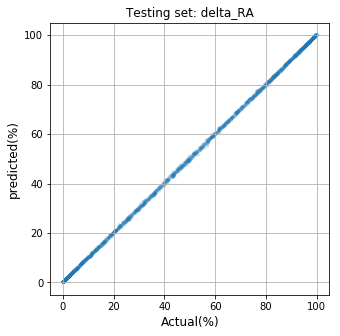

In [400]:
fig = plt.figure(figsize=(5,5))
plt.scatter(y_test, y_predict,marker="+",alpha=0.2,s=10)
plt.grid(True)
plt.xlabel('Actual(%)',fontsize=12)
plt.ylabel('predicted(%)',fontsize=12)
plt.title('Testing set: delta_RA',fontsize=12)